# BÀI TẬP LỚN 1  
## DEEP LEARNING

## Đề tài:  
### XÂY DỰNG MÔ HÌNH PHÂN LOẠI HÀNH ĐỘNG TRÒ CHƠI VECTOR  

**Sinh viên thực hiện** | **MSSV**  
---|---  
Trương Phú Quí | B2017075  
Phạm Hoàng Phong | B2113316  
Lê Sỹ Anh Tấn | B2113342  

# Chuẩn Bị Dữ Liệu

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
from PIL import Image
import keras
from sklearn.model_selection import train_test_split
from keras import layers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

/Users/ConCa/Documents/DeepLearning/Assignment/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# 4 classes name
class_names = ['run', 'slide', 'sprint', 'jump']

In [3]:
# Set image dimensions and the number of classes (for categorical labels)
image_size_1 = (224, 224)
image_size_2 = (64, 64)
num_classes = 4

In [4]:
def load_images_from_folder(folder_path, image_size):
    images = []
    labels = [] 
    
    for class_label, class_folder in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            # print("Acessable")
            print(class_path)
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                try:
                    
                    # Load image and convert to RGB
                    img = Image.open(img_path).convert('RGB')
                    
                    # Resize to the desired shape
                    img = img.resize(image_size)
                    
                    # Convert image to NumPy array
                    img_array = np.array(img)
                    # Append image and corresponding label
                    images.append(img_array)
                    labels.append(class_label)
                    # break
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
                    continue

    # Convert lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)
        
    # Normalize pixel values to the range [0, 1]
    images = images / 255.0
    
    # One-hot encode the labels
    labels = keras.utils.to_categorical(labels, num_classes)
    
    return images, labels


# Mô Hình Thứ 1 

Sử dụng 3 lớp tích chập với Input đầu vào là 224 x 224 

In [5]:
# Set the path to your images folder
folder_path = 'data'

# Load and preprocess images
images, labels = load_images_from_folder(folder_path, image_size_1)

# Check the shape of the data
print('Images shape:', images.shape)  # Should be (num_images, image_size[0], image_size[1], 3) for RGB images
print('Labels shape:', labels.shape)  # Should be (num_images, num_classes)

data/right
data/auto
data/up
data/down
Images shape: (2104, 224, 224, 3)
Labels shape: (2104, 4)


In [6]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2 , random_state=42)

# Check the shapes of the resulting datasets
print('Train images shape:', train_images.shape)
print('Train labels shape:', train_labels.shape)
print('Test images shape:', test_images.shape)
print('Test labels shape:', test_labels.shape)

Train images shape: (1683, 224, 224, 3)
Train labels shape: (1683, 4)
Test images shape: (421, 224, 224, 3)
Test labels shape: (421, 4)


In [7]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(224, 224, 3)), 
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),  
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),  
        layers.Dense(128, activation="relu"), 
        layers.Dense(num_classes, activation="softmax"),  
    ]
)
model.summary()

2024-10-06 14:58:32.443577: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-10-06 14:58:32.443597: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-10-06 14:58:32.443602: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-10-06 14:58:32.443616: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-06 14:58:32.443626: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
batch_size = 32
epochs = 10
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose = 1)


Epoch 1/10


2024-10-06 14:58:33.298933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.3736 - loss: 1.8578 - val_accuracy: 0.7181 - val_loss: 0.7783
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.7026 - loss: 0.7409 - val_accuracy: 0.7626 - val_loss: 0.6332
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.8068 - loss: 0.4782 - val_accuracy: 0.8487 - val_loss: 0.4725
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9424 - loss: 0.1784 - val_accuracy: 0.8457 - val_loss: 0.4622
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9544 - loss: 0.1296 - val_accuracy: 0.8576 - val_loss: 0.4976
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9734 - loss: 0.0950 - val_accuracy: 0.8516 - val_loss: 0.6624
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9852 - loss: 0.0517 - val_accuracy: 0.8694 - val_loss: 0.5105
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9835 - loss: 0.0584 - val_accuracy: 0.8665 - val_loss: 0

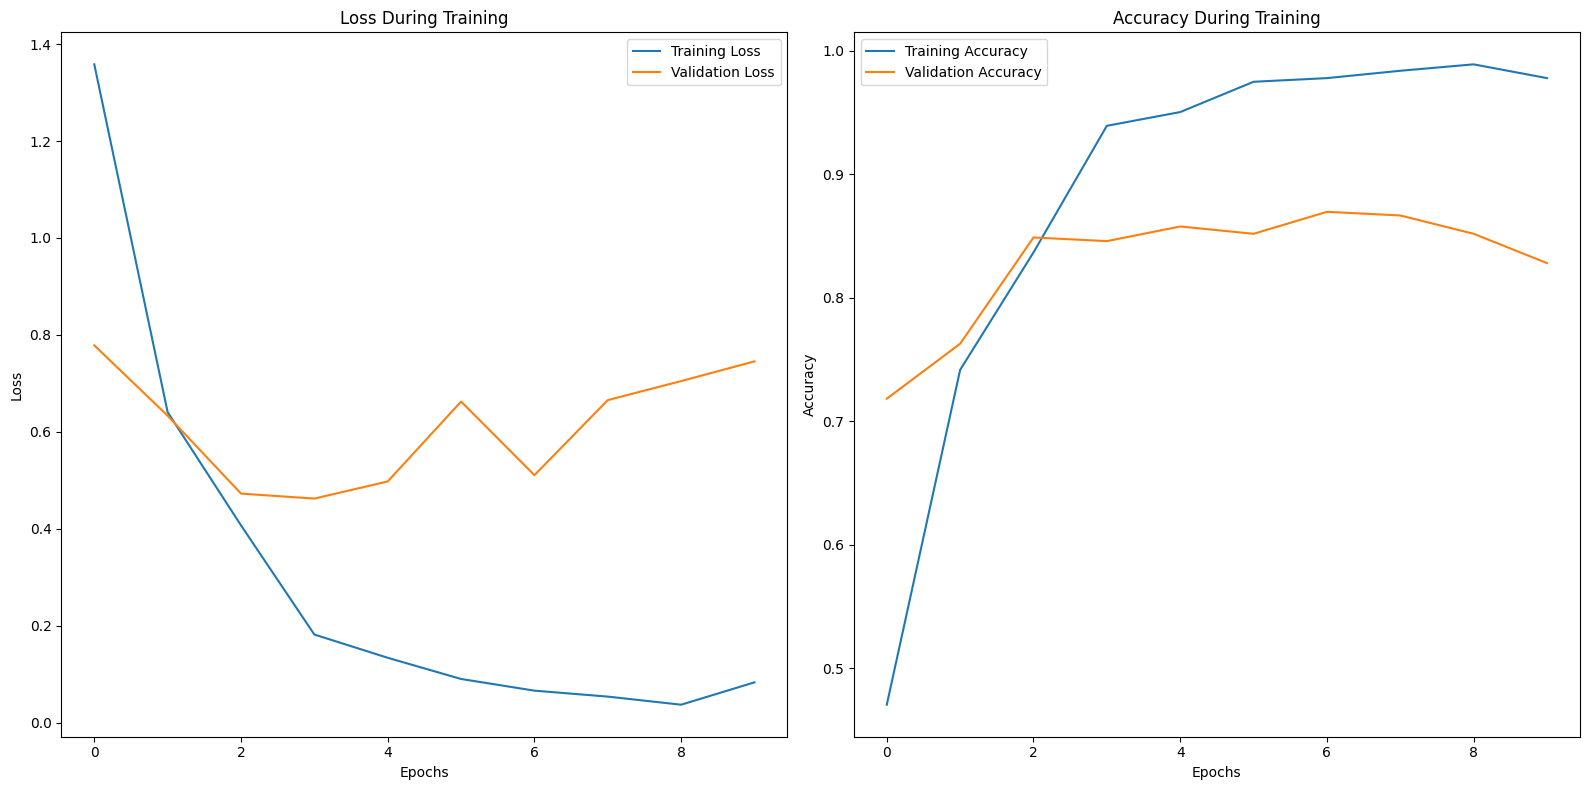

In [10]:
# Plot the loss and accuracy graphs together
plt.figure(figsize=(16, 8))

# Plot the loss graph
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy graph
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8082 - loss: 0.8316
Test accuracy: 0.8218527436256409
Test loss: 0.7359395027160645


In [12]:
# Make predictions on the test dataset
predictions = model.predict(test_images)

# Convert the predicted probabilities to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded test_labels to class indices for comparison
true_classes = np.argmax(test_labels, axis=1)
    
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')  # Use weighted for multi-class classification
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Accuracy: 0.8219
Precision: 0.8221
Recall: 0.8219
F1 Score: 0.8190


# Mô hình thứ 2 

- Input đầu vào là ảnh với kích thước 64x64 
- Mô hình CNN 2 lớp tích chập 

In [13]:
# Set the path to your images folder
folder_path = 'data'

# Load and preprocess images
images, labels = load_images_from_folder(folder_path, image_size_2)

# Check the shape of the data
print('Images shape:', images.shape)  # Should be (num_images, image_size[0], image_size[1], 3) for RGB images
print('Labels shape:', labels.shape)  # Should be (num_images, num_classes)

data/right
data/auto
data/up
data/down
Images shape: (2104, 64, 64, 3)
Labels shape: (2104, 4)


In [14]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2 , random_state=42)

# Check the shapes of the resulting datasets
print('Train images shape:', train_images.shape)
print('Train labels shape:', train_labels.shape)
print('Test images shape:', test_images.shape)
print('Test labels shape:', test_labels.shape)

Train images shape: (1683, 64, 64, 3)
Train labels shape: (1683, 4)
Test images shape: (421, 64, 64, 3)
Test labels shape: (421, 4)


In [15]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(64, 64, 3)), 
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(32, activation="relu"), 
        layers.Dense(num_classes, activation="softmax"),  
    ]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │       200,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,956 (804.52 KB)

 Trainable params: 205,956 (804.52 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
batch_size = 32
epochs = 10
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose = 1)

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.3661 - loss: 1.3215 - val_accuracy: 0.6588 - val_loss: 0.8878
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6838 - loss: 0.8328 - val_accuracy: 0.7359 - val_loss: 0.7028
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7581 - loss: 0.6279 - val_accuracy: 0.7834 - val_loss: 0.6081
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7983 - loss: 0.5324 - val_accuracy: 0.7982 - val_loss: 0.5786
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8401 - loss: 0.4161 - val_accuracy: 0.8131 - val_loss: 0.5170
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8596 - loss: 0.3980 - val_accuracy: 0.8042 - val_loss: 0.5319
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8857 - loss: 0.2901 - val_accuracy: 0.8131 - val_loss: 0.4999
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8881 - loss: 0.2869 - val_accuracy: 0.8309 - v

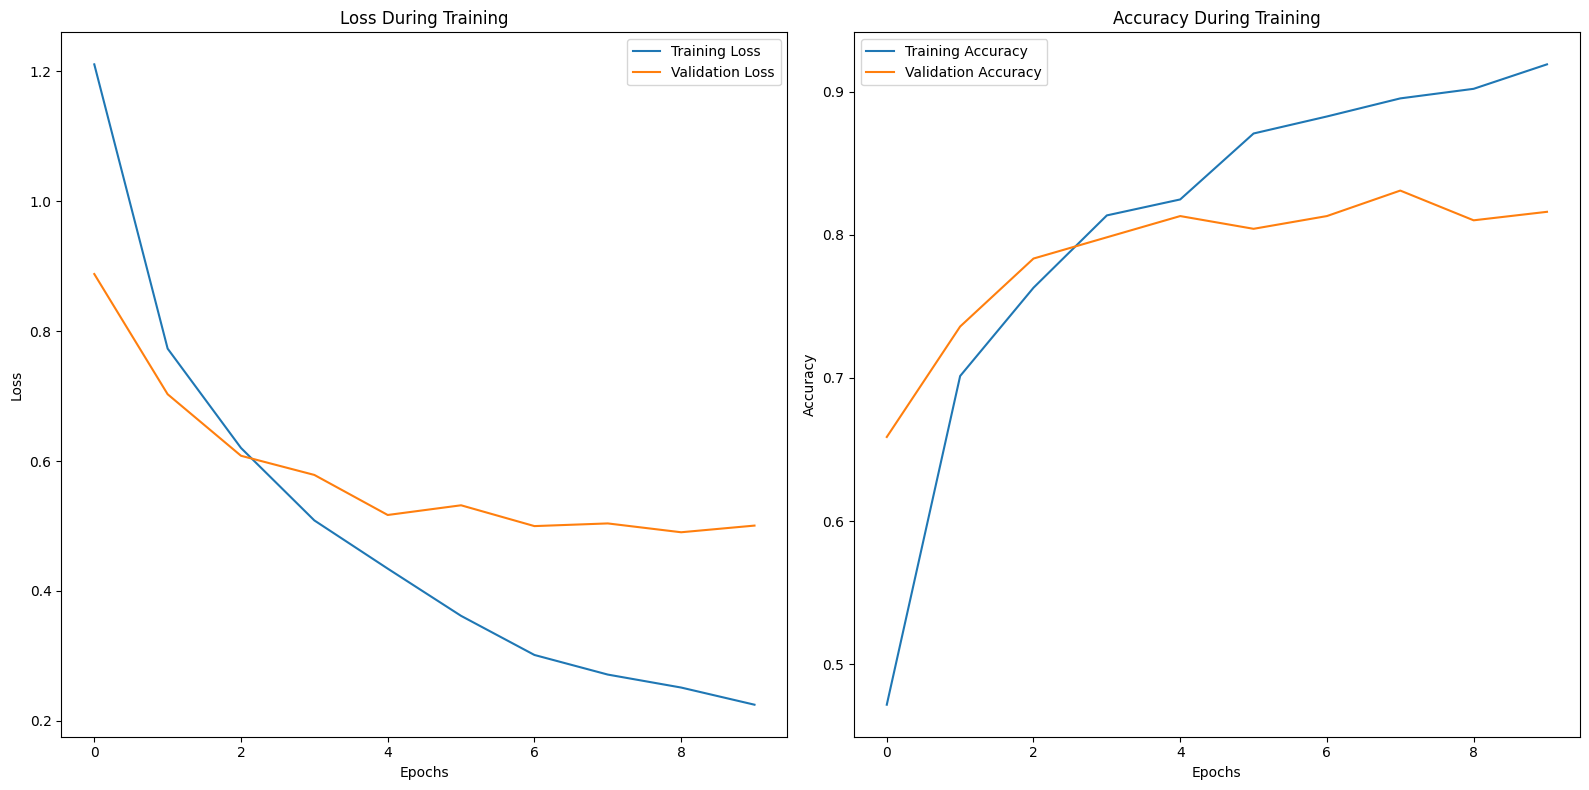

In [18]:
# Plot the loss and accuracy graphs together
plt.figure(figsize=(16, 8))

# Plot the loss graph
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy graph
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8033 - loss: 0.5560
Test accuracy: 0.826603353023529
Test loss: 0.5484761595726013


In [20]:
# Make predictions on the test dataset
predictions = model.predict(test_images)

# Convert the predicted probabilities to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded test_labels to class indices for comparison
true_classes = np.argmax(test_labels, axis=1)
    
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')  # Use weighted for multi-class classification
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.8266
Precision: 0.8349
Recall: 0.8266
F1 Score: 0.8282


# Mô hình thứ 3 

- Input đầu vào với kích thước 64 x 64 
- Mô hình với 3 lớp tích chập 

In [21]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2 , random_state=42)

# Check the shapes of the resulting datasets
print('Train images shape:', train_images.shape)
print('Train labels shape:', train_labels.shape)
print('Test images shape:', test_images.shape)
print('Test labels shape:', test_labels.shape)

Train images shape: (1683, 64, 64, 3)
Train labels shape: (1683, 4)
Test images shape: (421, 64, 64, 3)
Test labels shape: (421, 4)


In [22]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(64, 64, 3)), 
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(64, activation="relu"), 
        layers.Dense(num_classes, activation="softmax"),  
    ]
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,364 (669.39 KB)

 Trainable params: 171,364 (669.39 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
batch_size = 32
epochs = 10
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose = 1)

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.3215 - loss: 1.3343 - val_accuracy: 0.5816 - val_loss: 0.9644
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6514 - loss: 0.9087 - val_accuracy: 0.7329 - val_loss: 0.7497
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7330 - loss: 0.7158 - val_accuracy: 0.7122 - val_loss: 0.6719
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7671 - loss: 0.6279 - val_accuracy: 0.7300 - val_loss: 0.6247
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7577 - loss: 0.6191 - val_accuracy: 0.8012 - val_loss: 0.5518
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7968 - loss: 0.5290 - val_accuracy: 0.8131 - val_loss: 0.4879
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8288 - loss: 0.4569 - val_accuracy: 0.8071 - val_loss: 0.4845
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8577 - loss: 0.3940 - val_accuracy: 0.8487 - v

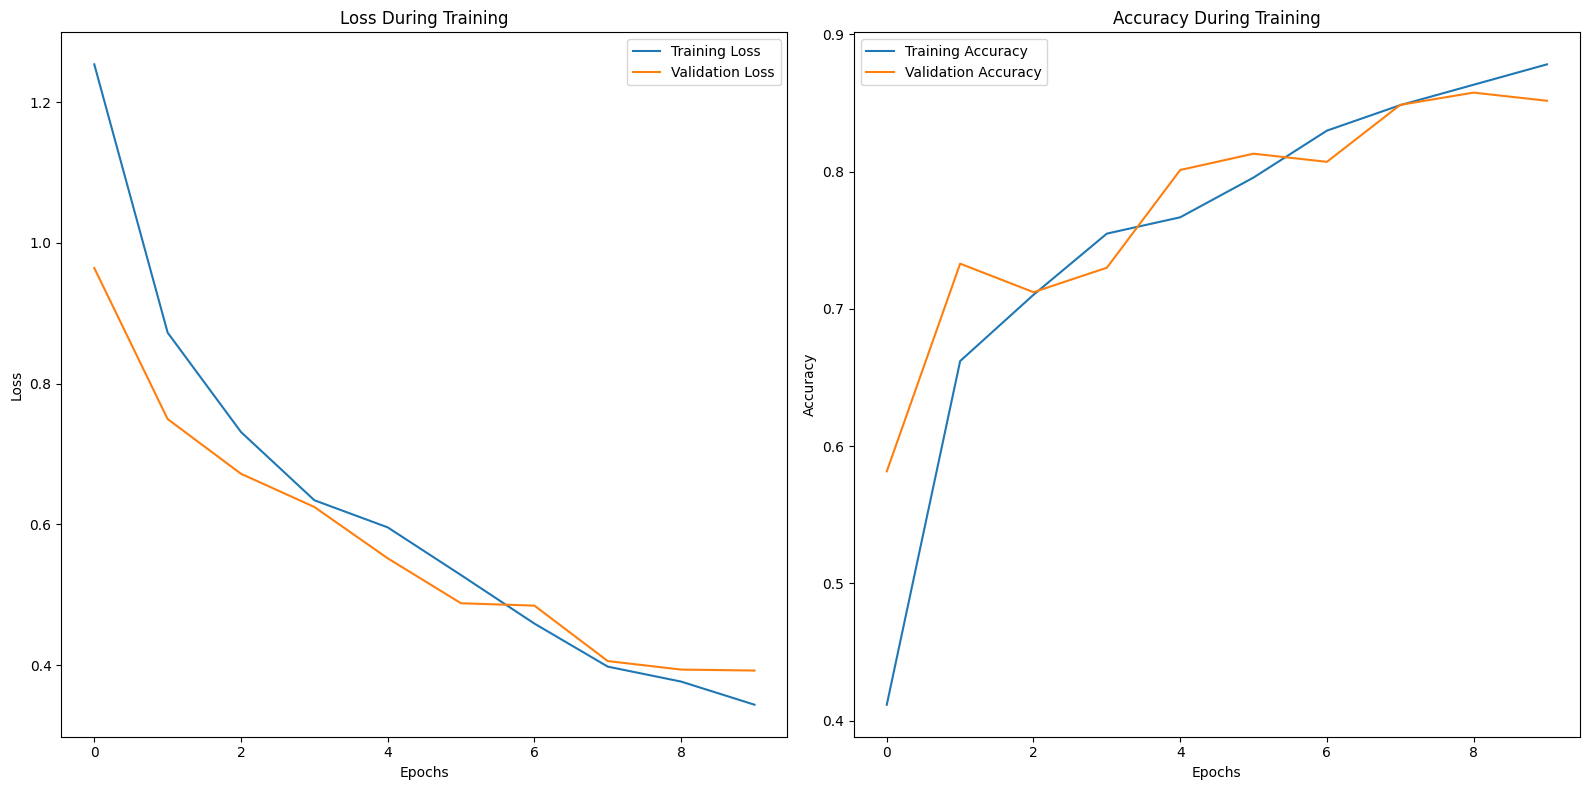

In [25]:
# Plot the loss and accuracy graphs together
plt.figure(figsize=(16, 8))

# Plot the loss graph
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy graph
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8069 - loss: 0.5287
Test accuracy: 0.8123515248298645
Test loss: 0.49954235553741455


In [27]:
# Make predictions on the test dataset
predictions = model.predict(test_images)

# Convert the predicted probabilities to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded test_labels to class indices for comparison
true_classes = np.argmax(test_labels, axis=1)
    
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')  # Use weighted for multi-class classification
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy: 0.8124
Precision: 0.8110
Recall: 0.8124
F1 Score: 0.8067
